# Imports

#### Loading the data from kaggle

In [33]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kundanbedmutha/exam-score-prediction-dataset")

print("Path to dataset files:", path)

Path to dataset files: /home/ender/.cache/kagglehub/datasets/kundanbedmutha/exam-score-prediction-dataset/versions/2


In [34]:
path

'/home/ender/.cache/kagglehub/datasets/kundanbedmutha/exam-score-prediction-dataset/versions/2'

#### Actual imports

In [35]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# Data Processing

In [47]:
df_raw = pd.read_csv(f"{path}/Exam_Score_Prediction.csv")

In [48]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   student_id        20000 non-null  int64  
 1   age               20000 non-null  int64  
 2   gender            20000 non-null  object 
 3   course            20000 non-null  object 
 4   study_hours       20000 non-null  float64
 5   class_attendance  20000 non-null  float64
 6   internet_access   20000 non-null  object 
 7   sleep_hours       20000 non-null  float64
 8   sleep_quality     20000 non-null  object 
 9   study_method      20000 non-null  object 
 10  facility_rating   20000 non-null  object 
 11  exam_difficulty   20000 non-null  object 
 12  exam_score        20000 non-null  float64
dtypes: float64(4), int64(2), object(7)
memory usage: 2.0+ MB


In [49]:
df_raw

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,1,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
1,2,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8
2,3,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
3,4,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7
4,5,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19997,18,other,bba,6.50,71.3,yes,5.0,good,self-study,low,easy,86.5
19996,19998,18,male,b.com,3.71,41.6,no,5.9,average,coaching,medium,moderate,60.9
19997,19999,19,other,diploma,7.88,68.2,yes,4.6,poor,group study,low,easy,64.5
19998,20000,19,male,bba,4.60,76.3,no,6.1,good,self-study,medium,moderate,79.0


### Mapping, assigning strings to_numeric

In [50]:
print("gender")
df_raw['gender'].unique()

print("internet_access")
df_raw['internet_access'].unique()

print("sleep_quality")
df_raw['sleep_quality'].unique()

print("study_method")
df_raw['study_method'].unique()

print("exam_difficulty")
df_raw['exam_difficulty'].unique()

gender
internet_access
sleep_quality
study_method
exam_difficulty


array(['hard', 'moderate', 'easy'], dtype=object)

In [51]:
mapping_gender = {"male" : 0, "other" : 1, "female" : 2}
df_raw['gender'] = df_raw['gender'].map(mapping_gender)

mapping_internet_acc = {"yes" : 1, "no" : 0}
df_raw['internet_access'] = df_raw['internet_access'].map(mapping_internet_acc)

mapping_sleep_q = {"poor" : 0, "average" : 1, "good" : 2}
df_raw['sleep_quality'] = df_raw['sleep_quality'].map(mapping_sleep_q)

mapping_study_m = {"coaching" : 0, "online videos" : 1, "mixed" : 2, "self-study" : 3, "group study" : 4}
df_raw['study_method'] : df_raw['study_method'].map(mapping_study_m)

mapping_exam_d = {"easy" : 0, "moderate" : 1, "hard" : 2}

df_raw['exam_difficulty'] =  df_raw['exam_difficulty'].map(mapping_exam_d)

In [52]:
df_raw.head()

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,1,17,0,diploma,2.78,92.9,1,7.4,0,coaching,low,2,58.9
1,2,23,1,bca,3.37,64.8,1,4.6,1,online videos,medium,1,54.8
2,3,22,0,b.sc,7.88,76.8,1,8.5,0,coaching,high,1,90.3
3,4,20,1,diploma,0.67,48.4,1,5.8,1,online videos,low,1,29.7
4,5,20,2,diploma,0.89,71.6,1,9.8,0,coaching,low,1,43.7


Dropping unnecessary columns

In [53]:
df_raw.drop(labels=["course", "study_method", "facility_rating", "student_id"], axis=1, inplace=True)

In [54]:
df_raw

,age,gender,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,exam_difficulty,exam_score
0,17,0,2.78,92.9,1,7.4,0,2,58.9
1,23,1,3.37,64.8,1,4.6,1,1,54.8
2,22,0,7.88,76.8,1,8.5,0,1,90.3
3,20,1,0.67,48.4,1,5.8,1,1,29.7
4,20,2,0.89,71.6,1,9.8,0,1,43.7
...,...,...,...,...,...,...,...,...,...
19995,18,1,6.50,71.3,1,5.0,2,0,86.5
19996,18,0,3.71,41.6,0,5.9,1,1,60.9
19997,19,1,7.88,68.2,1,4.6,0,0,64.5
19998,19,0,4.60,76.3,0,6.1,2,1,79.0


#### Checking correlations

In [55]:
df_correlated = df_raw.corr()

Text(0.5, 1.0, 'Correlations')

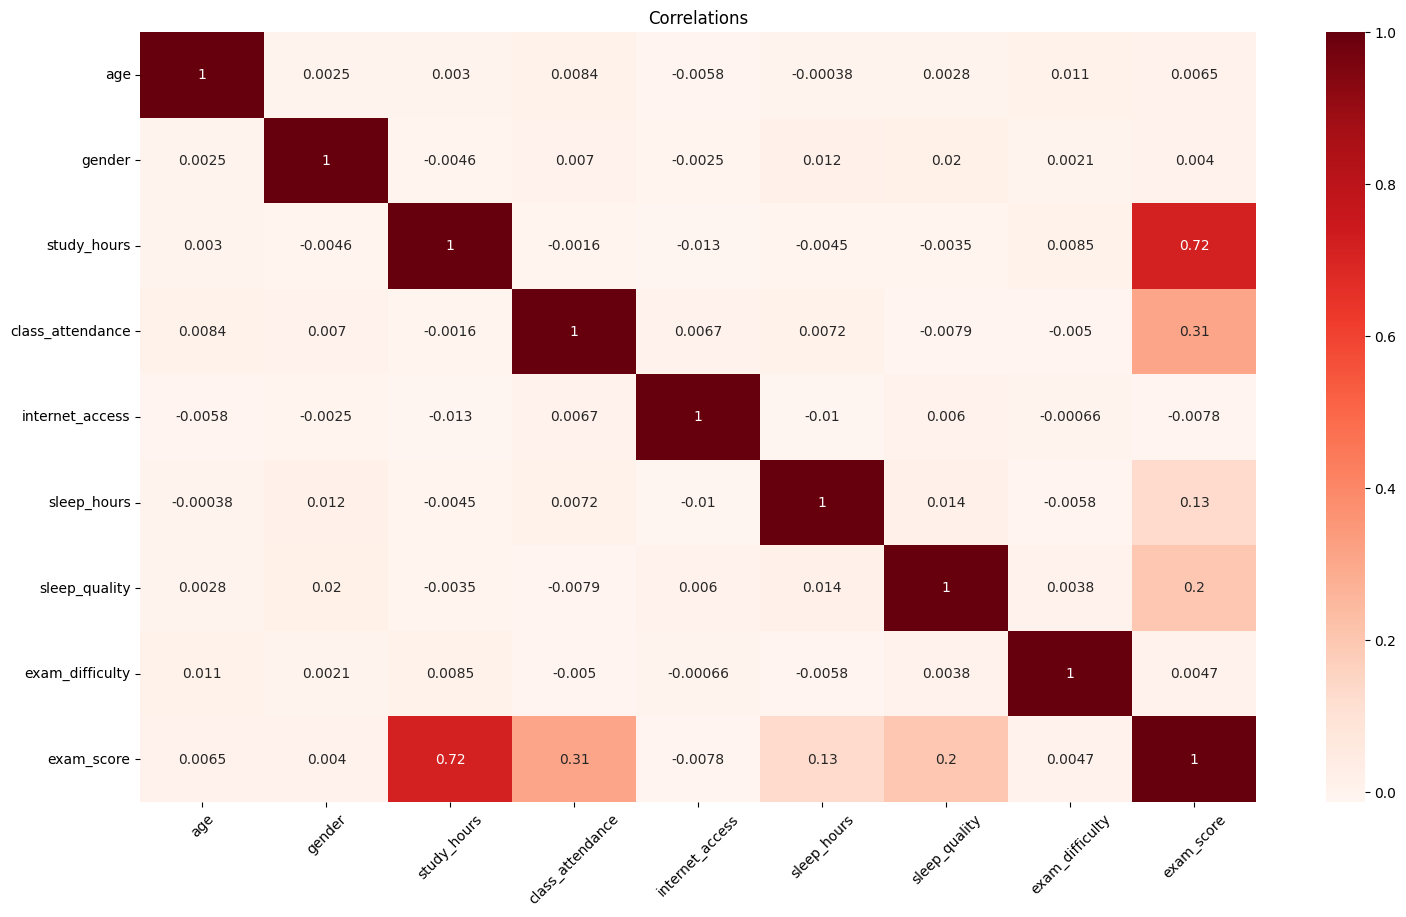

In [71]:
plt.figure(figsize=(18, 10))
sns.heatmap(df_correlated, fmt='.2g', cmap="Reds", annot=True)
plt.xticks(rotation=45)
plt.title("Correlations")